In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [3]:
def load_ppo_data(file_path,maxiter,spacing,dataname='Baseline'):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    total_data=[]
    for i in range(5):
        for data in fileslist:
            if data.find('rewards')!=-1:
                rewards = np.load(file_path+'/' +data)[i]
            elif data.find('success')!=-1:
                s_rate = np.load(file_path+'/' +data)[i]
            elif data.find('steps')!=-1 :
                steps = np.load(file_path+'/' +data)[i]
        train_epoch = np.arange(0,maxiter+1,spacing)
        df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Completion steps':steps,'Train epoch':train_epoch,'repeat':str(i),'schema':dataname})
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0)
    return total_data

In [13]:
def load_base_data(file_path,maxiter,spacing):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    total_data=[]
    for i in range(3):
        for data in fileslist:
            if data.find('rewards')!=-1:
                rewards = np.load(file_path+'/' +data)[i]
            elif data.find('steps')!=-1:
                steps = np.load(file_path+'/' +data)[i]
        train_epoch = np.arange(0,maxiter+1,spacing)
        s_rate = np.ones(train_epoch.shape[0])
        df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Completion steps':steps,'Train epoch':train_epoch,'repeat':str(i),'schema':file_path})
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0)
    return total_data

In [14]:
def load_ith_data(file_path,index,maxepoch,space,dataname):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    for data in fileslist:
        if data.find('Rewards')!=-1 and data[-5]== str(index):
            rewards = np.load(file_path+'/' +data)[0:maxepoch+1]
        elif data.find('success')!=-1 and data[-5]== str(index):
            s_rate = np.load(file_path+'/' +data)[0:maxepoch+1]
        elif data.find('steps')!=-1 and data[-5]== str(index):
            steps = np.load(file_path+'/' +data)[0:maxepoch+1]
    train_epoch = np.arange(0,maxepoch+1,space)
    df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Completion steps':steps,'Train epoch':train_epoch,'repeat':str(index),'schema':dataname})
    return df
def load_vdn_data(file_path,numtimes=5,maxepoch=100,space=5,dataname='VDN'):
    fileslist  = os.listdir(file_path)
    total_data = []
    for i in range(numtimes):
        df = load_ith_data(file_path,i,maxepoch,space,dataname)
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0,ignore_index=True)
    return total_data

[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]


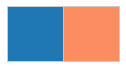

In [15]:
sns.set_theme(context='paper', style='whitegrid', font='Arial', font_scale=1.8)
# color = sns.color_palette('Paired',10)
color=[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765),(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]
sns.palplot(color)
sns.set_palette(color)
print(color)

In [20]:
ppodata2d = load_ppo_data('PPO-2d',100,5)
vdndata2d = load_vdn_data('vdn-2d',maxepoch=100,space=5)

In [24]:
print(ppodata2d)

     Rewards  Success rate  Steps  Train epoch repeat    schema
0  -10.76025          0.07  86.47            0      0  Baseline
1   -4.80525          0.09  83.06            5      0  Baseline
2   -6.41825          0.15  74.78           10      0  Baseline
3   -3.58575          0.28  58.36           15      0  Baseline
4   -2.84025          0.31  54.22           20      0  Baseline
..       ...           ...    ...          ...    ...       ...
16  -0.00900          0.96  13.50           80      4  Baseline
17   0.51725          0.98  11.24           85      4  Baseline
18   0.24950          0.96  11.56           90      4  Baseline
19   0.55375          0.99  10.52           95      4  Baseline
20   0.58500          0.99   9.92          100      4  Baseline

[105 rows x 6 columns]


In [21]:
totaldata2d = pd.concat([ppodata2d,vdndata2d],axis=0,ignore_index=True)

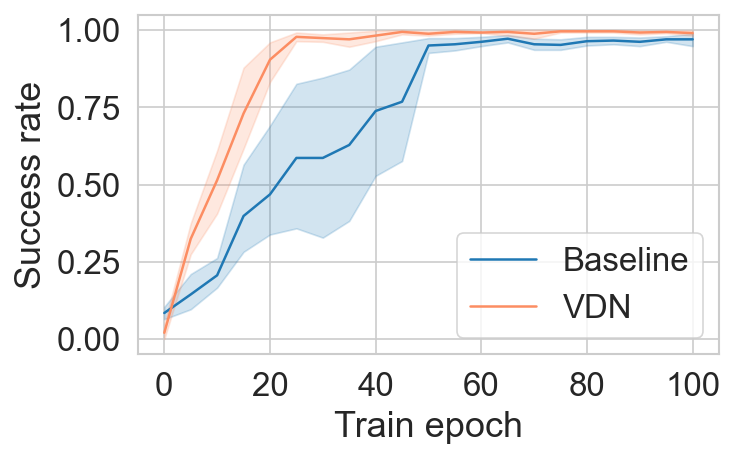

In [22]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=totaldata2d)
ax = plt.gca()
ax.set_xticks(range(0,101,20))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

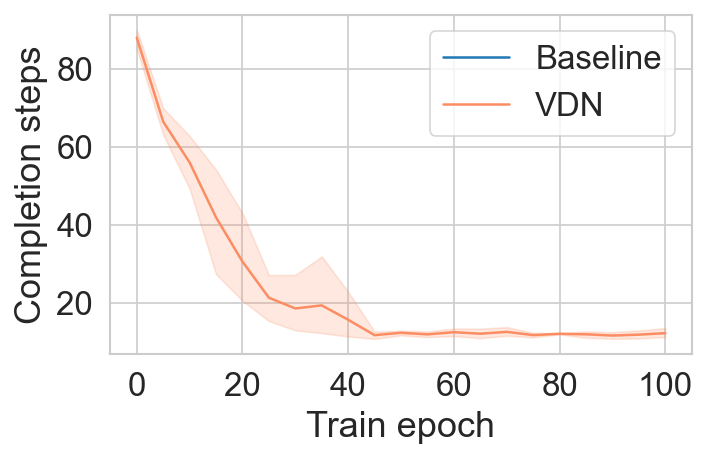

In [23]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Completion steps',hue='schema',data=totaldata2d)
ax = plt.gca()
ax.set_xticks(range(0,101,20))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

<AxesSubplot:xlabel='Train epoch', ylabel='Success rate'>

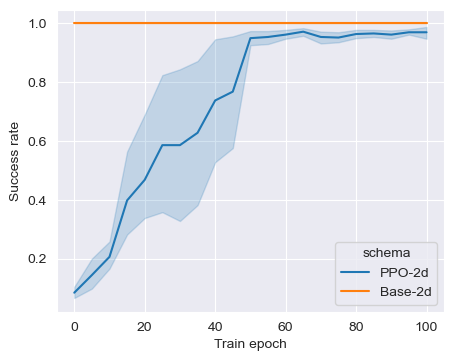

In [11]:
plt.figure(dpi=100,figsize=(5,4))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=totaldata2d)

In [17]:
ppodata3d = load_agent_data('PPO-3d',200,5)
basedata3d = load_base_data('Base-3d',200,5)

In [18]:
totaldata3d = pd.concat([ppodata3d,basedata3d],axis=0)

<AxesSubplot:xlabel='Train epoch', ylabel='Rewards'>

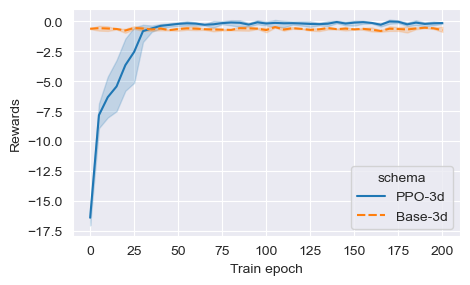

In [21]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Rewards',hue='schema',style='schema',data=totaldata3d)

<AxesSubplot:xlabel='Train epoch', ylabel='Steps'>

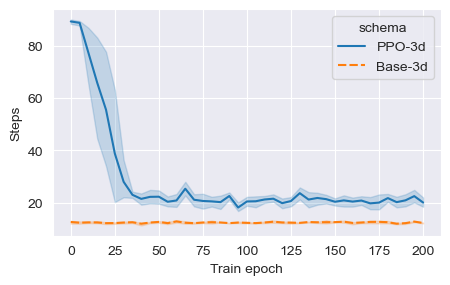

In [23]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Steps',hue='schema',style='schema',data=totaldata3d)

<AxesSubplot:xlabel='Train epoch', ylabel='Success rate'>

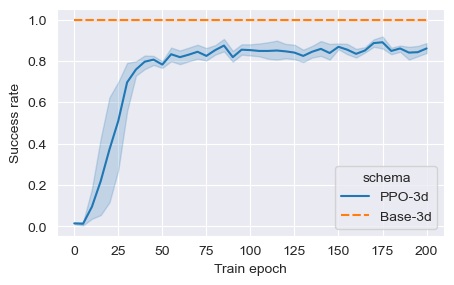

In [24]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',style='schema',data=totaldata3d)

In [37]:
ppodata4d = load_agent_data('PPO-4d',150,2)
basedata4d = load_base_data('Base-4d',150,2)
totaldata4d = pd.concat([ppodata4d,basedata4d],axis=0)

<AxesSubplot:xlabel='Train epoch', ylabel='Rewards'>

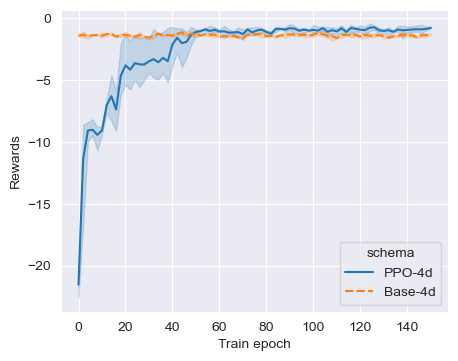

In [38]:
plt.figure(dpi=100,figsize=(5,4))
sns.lineplot(x='Train epoch',y='Rewards',hue='schema',style='schema',data=totaldata4d)

<AxesSubplot:xlabel='Train epoch', ylabel='Steps'>

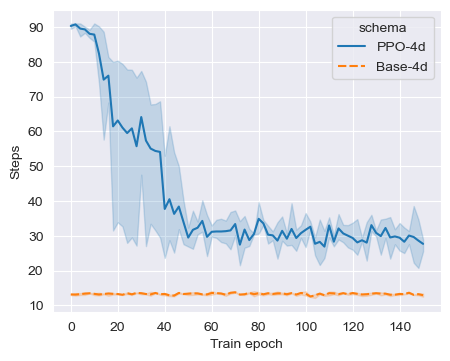

In [39]:
plt.figure(dpi=100,figsize=(5,4))
sns.lineplot(x='Train epoch',y='Steps',hue='schema',style='schema',data=totaldata4d)

<AxesSubplot:xlabel='Train epoch', ylabel='Success rate'>

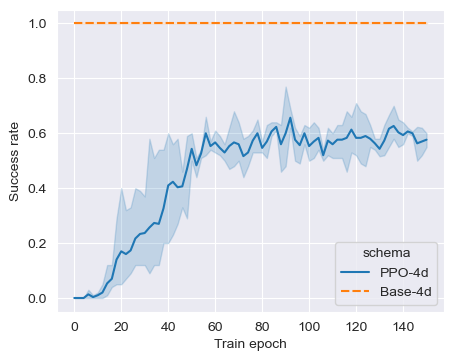

In [40]:
plt.figure(dpi=100,figsize=(5,4))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',style='schema',data=totaldata4d)